# Average and Median Spectrograms of Jupiter's Magnetic flux using over entire Cassini mission duration.

In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import matplotlib.colors as mp_colors
import matplotlib.pyplot as plt

Read the polygon's masked flux

In [ ]:
ds = xr.open_dataset('../data/calculated/SKR_poly_flux/poly_flux_combined.ncdf', engine='netcdf4')  # This file is all the masked polygon flux from all years combined together, yearly files generated from get_polygon_flux.ipynb
ds = ds.rename({'__xarray_dataarray_variable__': 'flux'})  # Rename flux values to flux

Create a panda dataframe with frequency values as columns

In [3]:
df = pd.DataFrame(ds["flux"].T, columns=ds["frequency"])
df["Universal Time"] = ds["time"]  # Rename column time to Universal Time
df

,3.9548,4.7729,5.7601,6.9516,8.3895,10.1248,12.2191,14.7465,17.796801,21.4779,...,1100.0,1150.0,1200.0,1250.0,1300.0,1350.0,1400.0,1450.0,1500.0,Universal Time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 00:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 00:03:00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 00:06:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 00:09:00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 00:12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-15 23:45:00
2403356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-15 23:48:00
2403357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-15 23:51:00
2403358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-15 23:54:00


Read the ephemeris data as a pandas dataframe

In [ ]:
df_ephemeris = pd.read_csv('../data/raw/20040101000000_20170915115700_ephemeris.csv')
df_ephemeris = df_ephemeris.rename(columns={'datetime': 'Universal Time'})  # Rename datetime column to Universal Time
df_ephemeris["Universal Time"] = df_ephemeris["Universal Time"].astype('datetime64[ns]')  # Convert time values to datetime64 for merging
df_ephemeris

,Universal Time,x_KSM,y_KSM,z_KSM,subLat,subLon,subLST,R_KSM
0,2004-01-01 00:00:00,664.545415,-1282.271820,-134.013894,-19.815933,78.646614,7.525833,1450.448673
1,2004-01-01 00:01:00,664.542412,-1282.267682,-134.011330,-19.815933,79.209665,7.525833,1450.443402
2,2004-01-01 00:02:00,664.539410,-1282.263543,-134.008771,-19.815932,79.772716,7.525833,1450.438131
3,2004-01-01 00:03:00,664.536407,-1282.259404,-134.006218,-19.815932,80.335768,7.525833,1450.432860
4,2004-01-01 00:04:00,664.533404,-1282.255265,-134.003670,-19.815932,80.898819,7.525833,1450.427589
...,...,...,...,...,...,...,...,...
7209352,2017-09-15 11:52:00,-0.092238,0.399237,0.032108,2.168796,157.198413,6.909167,0.411010
7209353,2017-09-15 11:53:00,-0.115321,0.401941,0.042341,2.325404,154.503713,7.126389,0.420295
7209354,2017-09-15 11:54:00,-0.138326,0.404378,0.052547,2.467676,151.956936,7.333611,0.430600
7209355,2017-09-15 11:55:00,-0.161239,0.406547,0.062719,2.596060,149.561459,7.530833,0.441828


Merge both dataframes on their Universal time column

In [5]:
df_all = df.merge(df_ephemeris, on='Universal Time')

We can now bin the values with respect to local time (subLST column)

In [6]:
bins = np.arange(0, 24.2, 0.2)  # 0 to 24hr with an interval of 12 min
df_all['local_time'] = pd.cut(df_all['subLST'], bins=bins) # Create and add bin column to the entire dataframe
df_all

,3.9548,4.7729,5.7601,6.9516,8.3895,10.1248,12.2191,14.7465,17.796801,21.4779,...,1500.0,Universal Time,x_KSM,y_KSM,z_KSM,subLat,subLon,subLST,R_KSM,local_time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2004-01-01 00:00:00,664.545415,-1282.271820,-134.013894,-19.815933,78.646614,7.525833,1450.448673,"(7.4, 7.6]"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2004-01-01 00:03:00,664.536407,-1282.259404,-134.006218,-19.815932,80.335768,7.525833,1450.432860,"(7.4, 7.6]"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2004-01-01 00:06:00,664.527398,-1282.246984,-133.998591,-19.815931,82.024922,7.525833,1450.417048,"(7.4, 7.6]"
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2004-01-01 00:09:00,664.518389,-1282.234557,-133.991020,-19.815930,83.714076,7.525833,1450.401235,"(7.4, 7.6]"
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2004-01-01 00:12:00,664.509381,-1282.222125,-133.983511,-19.815928,85.403231,7.525833,1450.385423,"(7.4, 7.6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2017-09-15 11:42:00,0.139428,0.358038,-0.070229,0.015129,188.760594,4.429722,0.390594,"(4.4, 4.6]"
2403115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2017-09-15 11:45:00,0.070198,0.373030,-0.039713,0.719633,179.076798,5.188056,0.381650,"(5.0, 5.2]"
2403116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2017-09-15 11:48:00,0.000552,0.385800,-0.008958,1.403289,169.250599,5.955556,0.385904,"(5.8, 6.0]"
2403117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2017-09-15 11:51:00,-0.069095,0.396269,0.021855,1.997736,160.033934,6.682778,0.402841,"(6.6, 6.8]"


Group values by bins and take their mean/median per frequency per bin

In [7]:
df_mean = df_all.groupby('local_time').mean()
df_median = df_all.groupby('local_time').median()

/var/folders/j9/q8hqts053r57j7y11x4bv2_c0000gn/T/ipykernel_57689/1511130122.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mean = df_all.groupby('local_time').mean()
/var/folders/j9/q8hqts053r57j7y11x4bv2_c0000gn/T/ipykernel_57689/1511130122.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_median = df_all.groupby('local_time').median()


The first 48 columns are all the frequency-flux values

In [8]:
mean_flux = df_mean.iloc[:, :48].to_numpy()
median_flux = df_median.iloc[:, :48].to_numpy()

Plots

In [9]:
bins

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
       11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
       13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2,
       15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4,
       17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6,
       19.8, 20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8,
       22. , 22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8, 24. ])

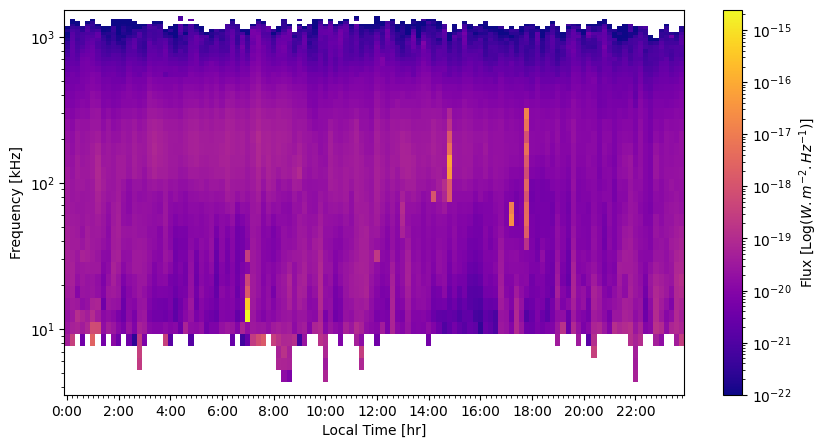

In [10]:
fig = plt.figure(figsize=(10,5), dpi=100)
ax = fig.add_subplot()

norm = mp_colors.LogNorm(vmin=1e-22)
cbar = ax.pcolormesh(bins[:-1], ds["frequency"], mean_flux.T, norm=norm, cmap='plasma')

fig.colorbar(cbar, label=r'Flux [Log($W.m^{-2}.Hz^{-1}$)]')

ax.set_xticks(bins[:-1:10])
ax.set_xticks(bins[:-1], minor=True) # Check minute ticks to macth bins
ax.xaxis.set_major_formatter('{x:.0f}:00')

ax.set_yscale('log')
ax.set_xlabel('Local Time [hr]')
ax.set_ylabel('Frequency [kHz]');
#ax.set_title('Polygon-selected Mean Magnetic Flux per frequency channel per local time over entire Cassini duration');

think about data distribution

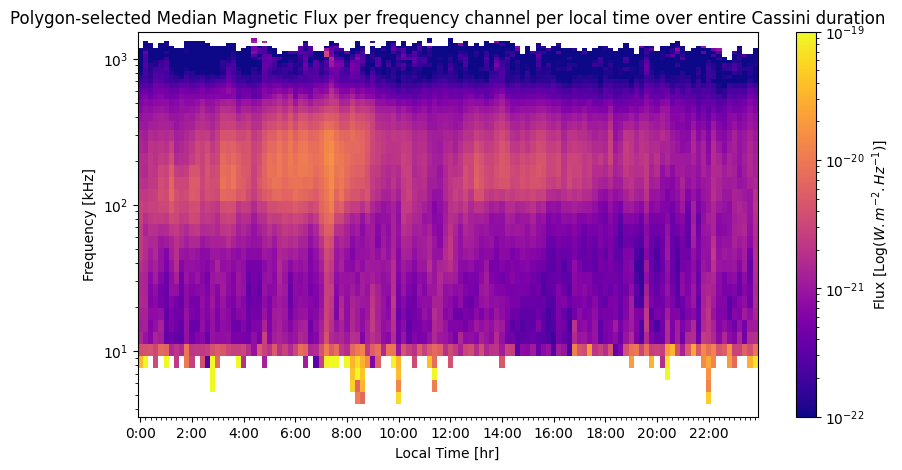

In [12]:
fig = plt.figure(figsize=(10,5), dpi=100)
ax = fig.add_subplot()

norm = mp_colors.LogNorm(vmin=1e-22, vmax=1e-19)
cbar = ax.pcolormesh(bins[:-1], ds["frequency"], median_flux.T, norm=norm, cmap='plasma')

fig.colorbar(cbar, label=r'Flux [Log($W.m^{-2}.Hz^{-1}$)]')

ax.set_xticks(bins[:-1:10])
ax.set_xticks(bins[:-1], minor=True)
ax.xaxis.set_major_formatter('{x:.0f}:00')

ax.set_yscale('log')
ax.set_xlabel('Local Time [hr]')
ax.set_ylabel('Frequency [kHz]');
ax.set_title('Polygon-selected Median Magnetic Flux per frequency channel per local time over entire Cassini duration');